<div style="background-color:rgba(100, 160, 200, 0.33);">

<h1>Assignment 3 - Mobile Tracking</h1>

</div>

<p>
    <b>Abstract</b>: Monitor and analyze the mobility of nearby mobile device users, using Wi-Fi probe requests.
</p>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Introduction and outline </h2>

<p>
    We collected our data in various places: Chicago airport, Chicago downtown, Warsaw airport, and Ingolstadt Village. Among them, the Chicago downtown dataset is collected while I walked around, the others are collected in a fixed place. Since we covered three very different countries, we want to know if there are some differences in the data we collected. First, we will look at the device vendors' frequency. Then, we want to see how many new MAC address appear during the period.
<p>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Device vendor frequency </h2>

In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

lst = []
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

def get_unique_list(file):
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst.append(row[2])
        return Counter(lst)
    
def create_histogram(list, ven):
    for v in ven:
        for lst in list:
            if lst.startswith(v[0]):
                v[1] += 1
    return ven

def plot_histogram(lst):
    plt.figure(1,figsize=(10,5)) 
    
    y_pos = np.arange(len(lst))
    accesses = [x[1] for x in lst]
    
    plt.bar(y_pos, accesses, align='center', alpha=0.5) 
    plt.xticks(range(len(lst)), [x[0] for x in lst], size='medium')
 
    plt.xlabel('Device Vendor')
    plt.ylabel('# Probe Requests')
    plt.title('Probe requests per device vendor')
    plt.show()


<h3> Chicago Airport Data </h3>

In [2]:
lst_c = get_unique_list('airport_chicago/probe_req.csv')
hist_c = create_histogram(lst_c, vendor)
print(hist_c)

[['Apple', 69], ['Google', 71], ['Samsung', 42], ['LGE', 11], ['HTC', 5], ['Huawei', 2], ['Xiaomi', 2], ['HMD', 1], ['Nest', 3]]


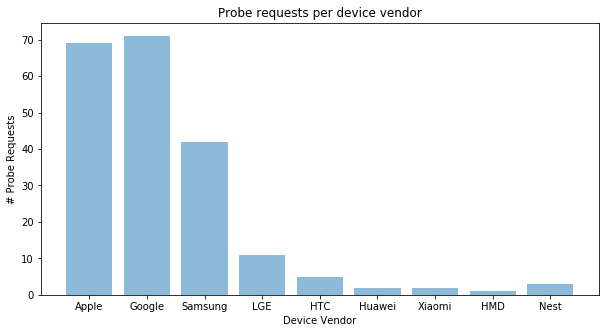

In [3]:
plot_histogram(hist_c)

<h3> Warsaw Airport Data </h3>

In [4]:
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

lst_w = get_unique_list('airport_warsaw/probe_req.csv')
hist_w = create_histogram(lst_w, vendor)
print(hist_w)

[['Apple', 130], ['Google', 95], ['Samsung', 58], ['LGE', 11], ['HTC', 5], ['Huawei', 7], ['Xiaomi', 7], ['HMD', 1], ['Nest', 3]]


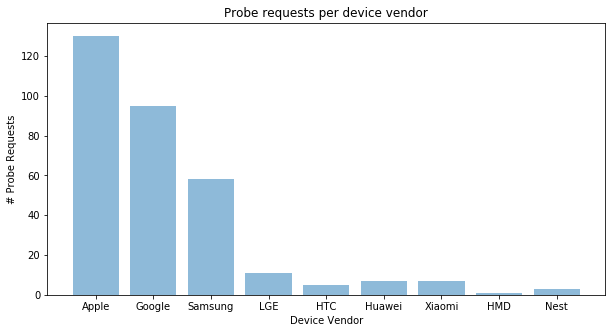

In [5]:
plot_histogram(hist_w)

<h3> Chicago Downtown Dataset </h3>

In [6]:
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

lst_cd = get_unique_list('downtown_chicago/probe_req.csv')
hist_cd = create_histogram(lst_cd, vendor)
print(hist_cd)

[['Apple', 215], ['Google', 688], ['Samsung', 82], ['LGE', 33], ['HTC', 5], ['Huawei', 7], ['Xiaomi', 7], ['HMD', 1], ['Nest', 7]]


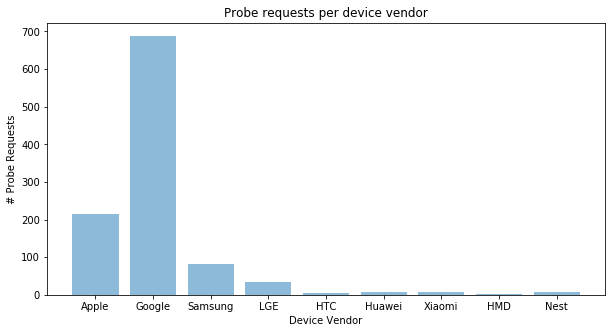

In [7]:
plot_histogram(hist_cd)

<h3> Ingolstadt Dataset </h3>

In [8]:
lst_c = get_unique_list('ingolstadt/ingolstadt.csv')
hist_c = create_histogram(lst_c, vendor)
print(hist_c)

IndexError: list index out of range

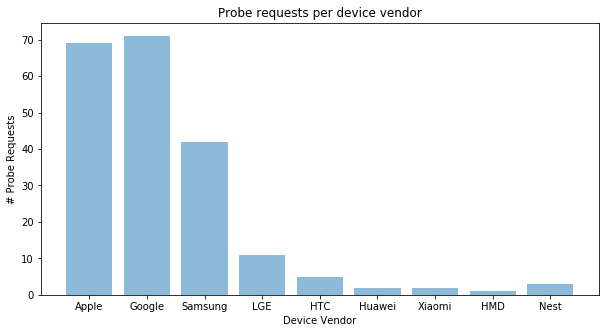

In [9]:
plot_histogram(hist_c)

<h3> Analysis </h3>

The device vendor distribution is similar in both the captures as infered from the plots. Apple is the single most popular device vendor followed by Google and its Android counterparts. But it somehow doesn't make much sense since we know that the popularity of Google's Pixel/Nexus phone is not comparable to Apple. So we refer to some other resources to check where do these MAC address come from. For example, da:a1:19:XX:XX:XX is marked as Google in the Wireshark and it also shows up in Wireshark database. But we could not find it in IEEE OUI list (http://standards-oui.ieee.org/oui.txt). So we guess some Android phones might have some kind of randomize mechanisms that they are marked Google.

Also, one thing interesting to note is that there is significantly more Android devices on Chicago street and Ingolstadt street than in the airport. I don't want to draw conclusions or infer causality merely from this data. But it shows that there are some differences between air travelers and street pedestrians.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Wildcard or not? </h2>

In [10]:
def get_info_list(file):
    lst_info = []
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst_info.append(row[6])
        return lst_info
    
def isWildcard(list):
    count = 0
    for lst in list:
        if 'Wildcard' in lst: 
            count += 1
    return count    

lst_i_c = get_info_list('airport_chicago/probe_req.csv')
wild_c = isWildcard(lst_i_c)
wildcard_per_c = (wild_c/len(lst_i_c))*100
print("At Chicago airport, " + str(round(wildcard_per_c, 2)) + "% of probe requests are wildcard requests.")

lst_i_w = get_info_list('airport_warsaw/probe_req.csv')
wild_w = isWildcard(lst_i_w)
wildcard_per_w = (wild_w/len(lst_i_w))*100
print("At Warsaw airport, " + str(round(wildcard_per_w, 2)) + "% of probe requests are wildcard requests.")

lst_i_w = get_info_list('downtown_chicago/probe_req.csv')
wild_w = isWildcard(lst_i_w)
wildcard_per_w = (wild_w/len(lst_i_w))*100
print("At Chicago downtown, " + str(round(wildcard_per_w, 2)) + "% of probe requests are wildcard requests.")

At Chicago airport, 78.18% of probe requests are wildcard requests.
At Warsaw airport, 81.25% of probe requests are wildcard requests.
At Chicago downtown, 76.4% of probe requests are wildcard requests.


<h3> Analysis </h3>

- It can be noted that a majority of probe requests, greater than 75 percent are wildcard requests. Wildcard requests enhance the privacy of the user by not sending a list of the most frequently used SSIDs. 
- Still a sizable percentage of probe requests broadcast the SSIDs. It implies a portion of users are still vulnerable. The parties interested in probe request analysis can still perform it but with a reduced dataset. 

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Probe Request Analysis </h2>

In [5]:
%matplotlib inline
TIME_INDEX = 1
INFO_INDEX = -1
PROBE_INDEX = 6
MAC_INDEX = 2
import numpy as np
import matplotlib.pyplot as plt

class Analyser:
    def __init__(self):
        self.x = []
        self.y = []

    def readCSV(self, filename):
        file = open(filename, 'r')
        #return  file.readlines()
        return file

    def show(self):
        plt.figure(2,figsize=(20,10)) 
        plt.plot(self.x, self.y)
        #plt.xlabel('Time (seconds)')
        plt.xlabel('Time (5 seconds)')
        plt.ylabel('# devices connected')
        plt.title('Probe requests analysis')
        plt.show()
        plt.show()

    def processData(self):
        pass

class ProbeAnalysis(Analyser):
    def __init__(self, filename):
        super().__init__()
        self.filename = filename
        self.mac = []
        self.wantedList = ["Raspberr_3f:48:74", "Raspberr_76:f1:56", "AVMAudio_42:d6:ff", "Sagemcom_9b:c2:74"]

    def isWildcard(self, inp):
        if len(inp) >= 2 and inp[1] == "Wildcard (Broadcast)":
            return True
        return False
    def processData(self):
        result = {}
        file = self.readCSV(self.filename)
        document = file.readlines()
        size = int(float(document[-1].split(",")[1][1:-1]))//5
        #document = self.readCSV(self.filename)
        #size = int(float(document[-1].split(",")[1][1:-1]))
        print("Length of the period: " + str(size))
        self.x = np.array(range(0, size + 1))
        for i in range(size):
            result[i] = []
        #print(self.x)
        for line in document:
            line = line.split(',')
            wildcard = line[INFO_INDEX][:-2].split("=")

            if line[PROBE_INDEX][1:] == "Probe Request" and self.isWildcard(wildcard) and line[MAC_INDEX][1:-1] not in self.wantedList :

                #key = int(float(line[TIME_INDEX][1:-1]))
                key = int(float(line[TIME_INDEX][1:-1]))//5
                if key not in result.keys():
                    result[key] = []
                #result[key] = result[key] + [line[MAC_INDEX][1:-1]]
                result[key] = result[key] + [line[MAC_INDEX]]

                if line[MAC_INDEX][1:-1] not in self.mac:
                    self.mac.append(line[MAC_INDEX][1:-1]) #add mac_addr list

        return result

    def constructProbeAnalysis(self, result):
        self.y = [len(result[x]) for x in result.keys()]
        print("Total Number of Prob Requests: " + str(sum(self.y)))
        #print(self.y)
        #print(len(self.y))
        #print(sum(self.y))
       

    def constructMacAnalysis(self, result):
        temp = []
        mac = []
        for i in result.keys():
            count = 0
            for j in result[i]:
                if j not in mac:
                    mac.append(j)
                    count = count + 1
            temp.append(count)
        self.y = temp
    
       

    def getMacNum(self):
        return self.mac

<h2> Customer/Tourist time and behavior in Ingolstadt Village </h2>

<p> Since the bus comes hourly, we can detect differences between number of customers arrived by private car, and a bus by observing probe request combine with the number of new mac address detected over the time. </p>

<h3> New Mac address analysis </h3>
<img src="ingolstadt_new_mac.png" alt="Ingolstadt New Mac Address" style="float: left;">
<p> Neverthelss some vender regerates mac address in scheduled time, we can still detect a huge increase of a new mac address during 2pm-4pm (in the middle of the graph) indicate more devices, or more customer during that time (recorded on 3 January 2020). </p>

Length of the period: 3765


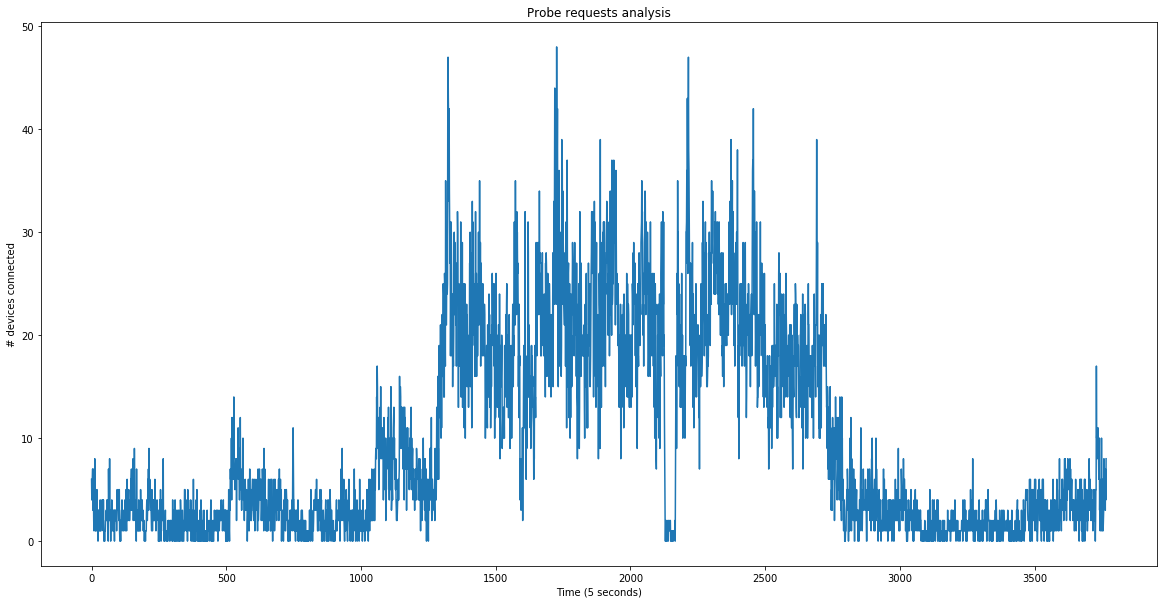

# Newly connected devices at a given time


In [6]:
app = ProbeAnalysis("ingolstadt/ingolstadt.csv")
result = app.processData()

app.constructMacAnalysis(result)
app.show()
print("# Newly connected devices at a given time")

<h3> Probe request analysis </h3>
<img src="ingolstadt_mac.png" alt="Ingolstadt Mac Address" style="float: left;">
<p>  Again in a very similar result (wildcard only). The number of probe request reached peak point on the exact amount of time as the previous graph, and the trend goes on without or small periodic behavior. Therefore we can extract the following information <p>
<ul> 
    <li> Transportation by car is a higher proportion of customer in Ingolstadt villege (as we cannot see a huge up and down very hour) </li>
    <li> Customer peak time is during 2pm until 4pm </li>
</ul>

In [ ]:
app.constructProbeAnalysis(result)
app.show()
print("# Devices connected at a given time")

<h3> Chicago Airport Data </h3>

Length of the period: 248
Total Number of Prob Requests: 4134


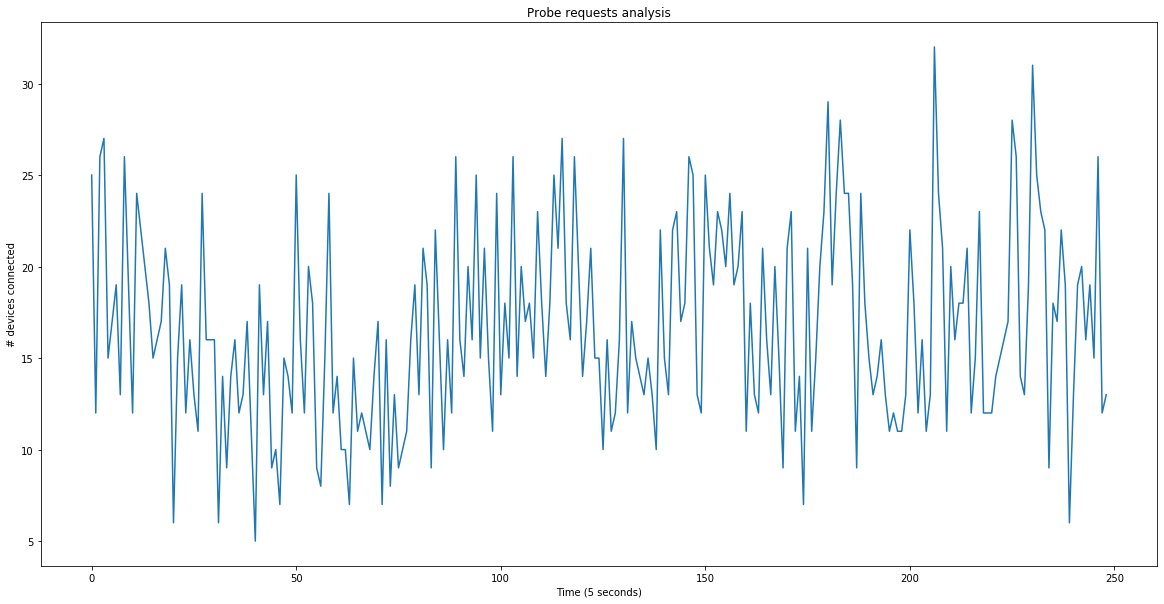

# Devices connected at a given time


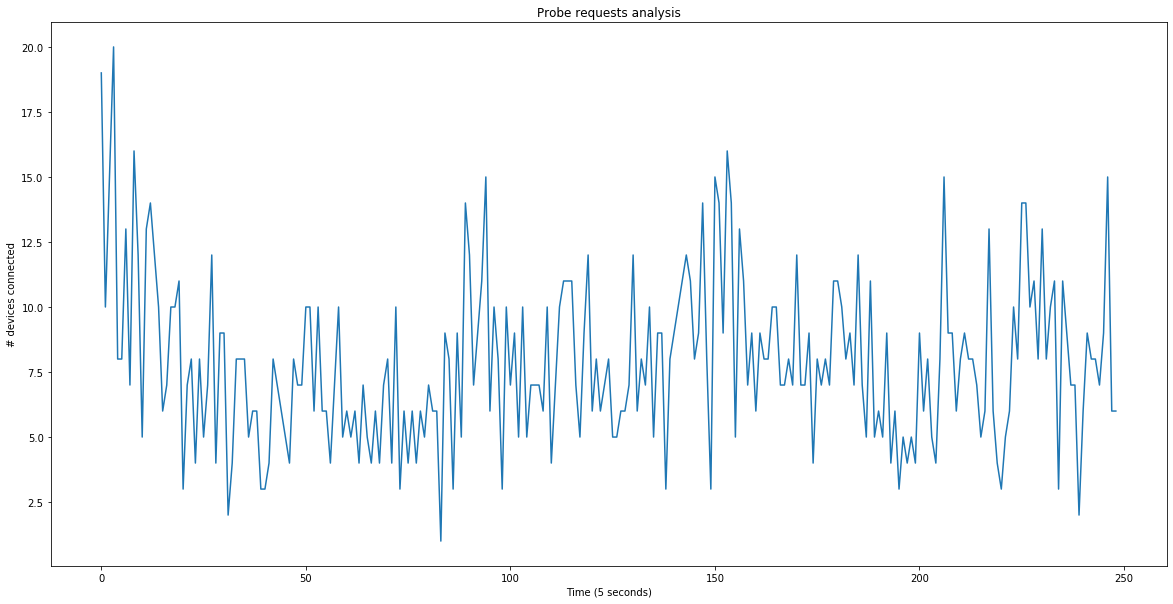

# Newly connected devices at a given time


In [6]:
#Chicago Airport Data

app = ProbeAnalysis("airport_chicago/probe_req.csv")
result = app.processData()
app.constructProbeAnalysis(result)
app.show()
print("# Devices connected at a given time")

app.constructMacAnalysis(result)
app.show()
print("# Newly connected devices at a given time")

<h3> Warsaw Airport Data </h3>

Length of the period: 266
Total Number of Prob Requests: 3387


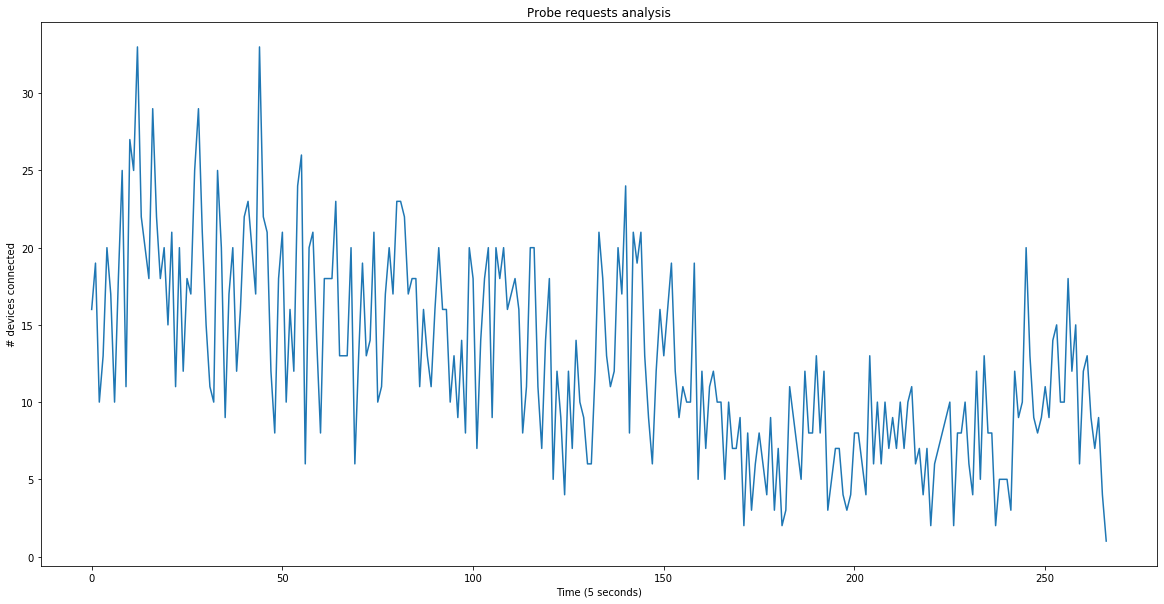

# Devices connected at a given time


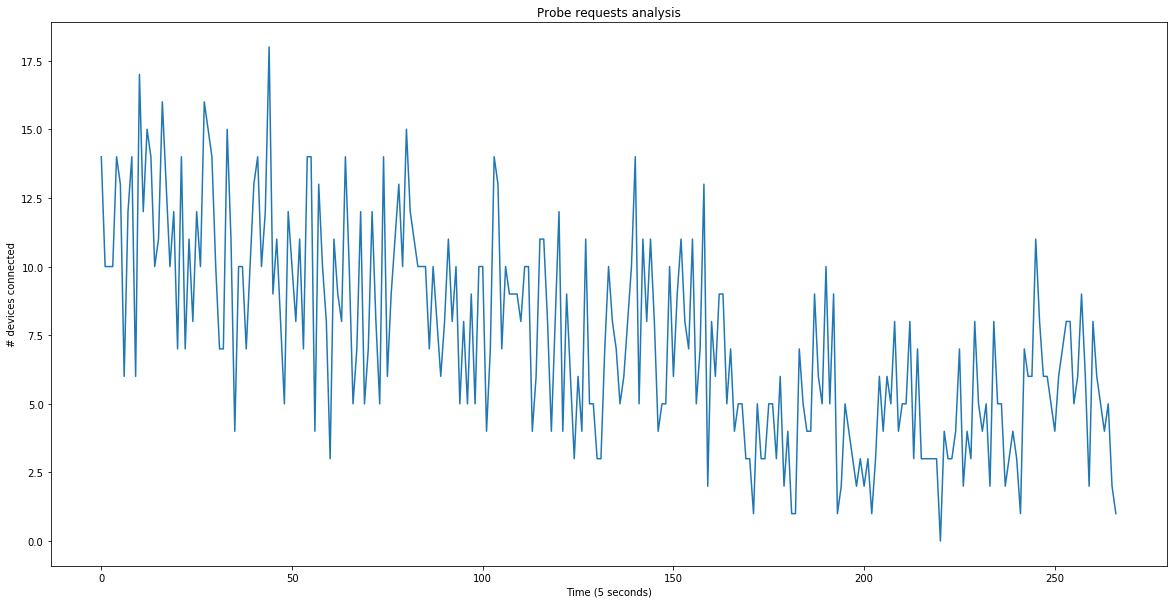

# Newly connected devices at a given time


In [7]:
#Warsaw Airport Data
app = ProbeAnalysis("airport_warsaw/probe_req.csv")
result = app.processData()
app.constructProbeAnalysis(result)
app.show()
print("# Devices connected at a given time")

app.constructMacAnalysis(result)
app.show()
print("# Newly connected devices at a given time")

<h3> Downtown Chicago Data </h3>

Length of the period: 467
Total Number of Prob Requests: 10460


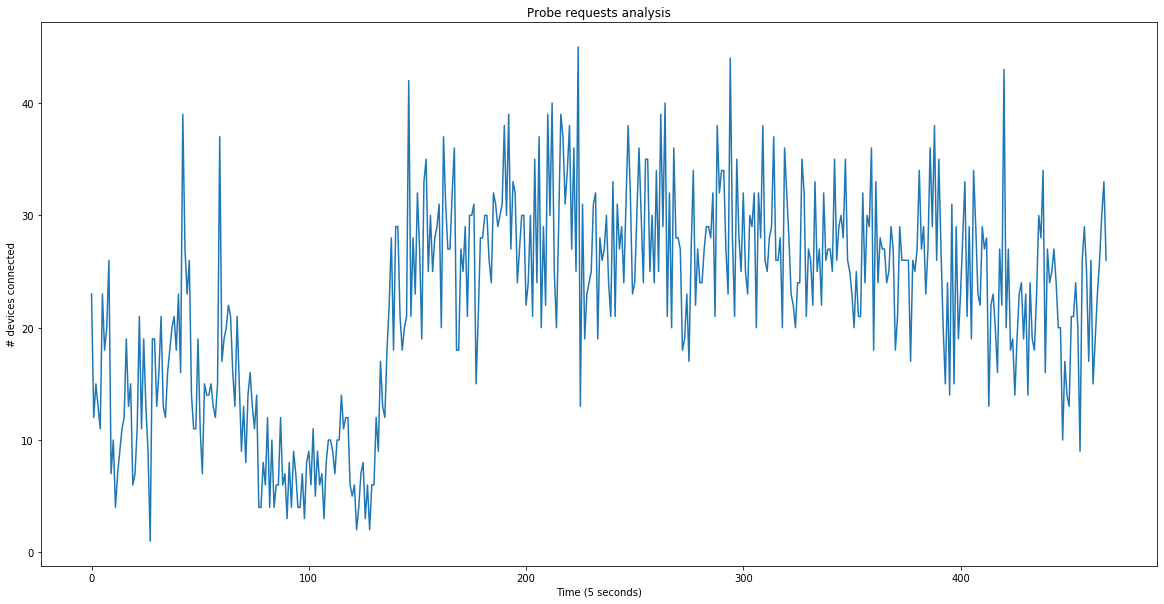

# Devices connected at a given time


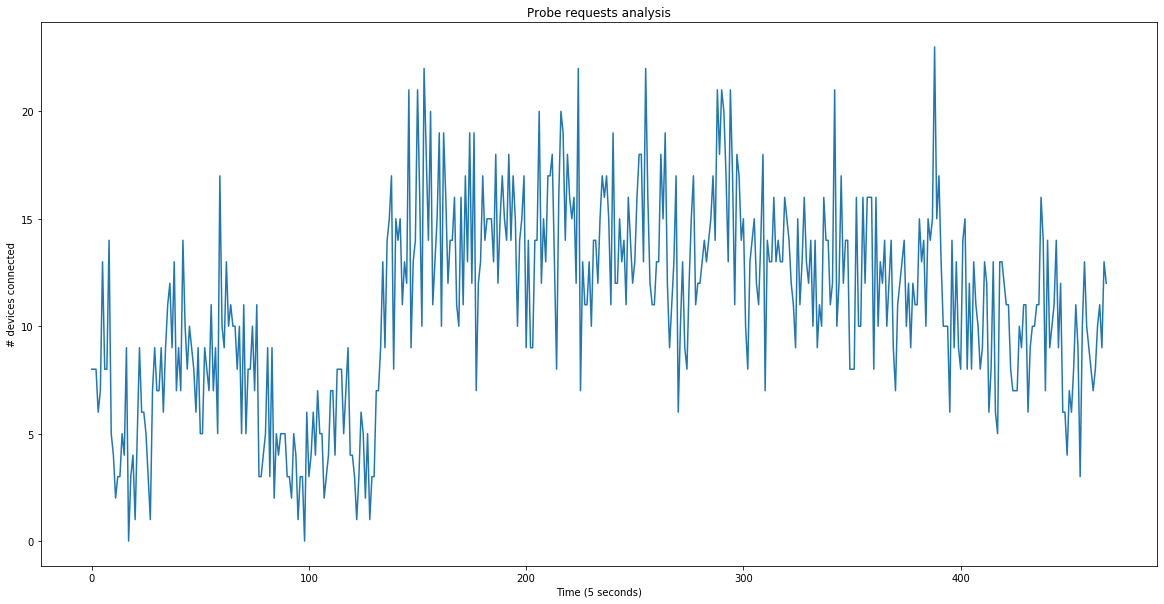

# Newly connected devices at a given time


In [70]:
#Downtown Chicago Data
app = ProbeAnalysis("downtown_chicago/probe_req.csv")
result = app.processData()
app.constructProbeAnalysis(result)
app.show()
print("# Devices connected at a given time")

app.constructMacAnalysis(result)
app.show()
print("# Newly connected devices at a given time")

<h3>Analysis</h3>

Since Airport datasets are collected in fixed places and shorter period, there is actually not much information in it. But we can see a different in the Chicago Downtown dataset. We see an increase around 130\*5 = 650 seconds after the collection started. That's about the time I went out and get on the subway. 

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Probe Response Analysis</h2>

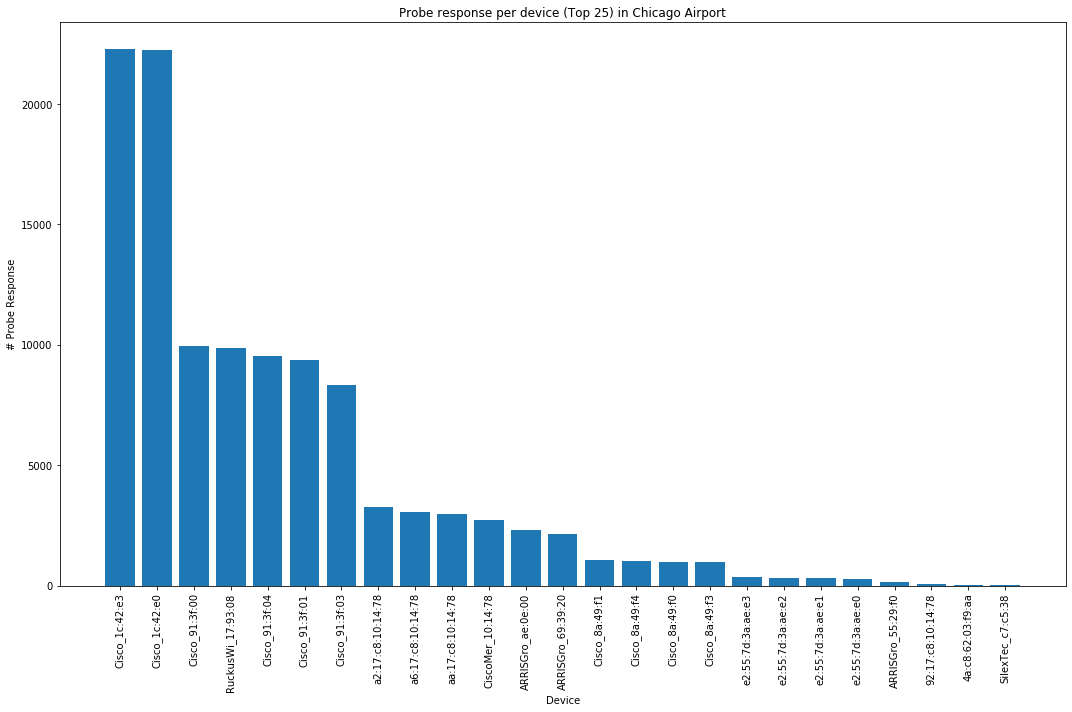

In [71]:
ap_lst = []
vendor = [['Cisco', 0],
          ['Ruckus', 0],
          ['ARRIS', 0],
          ['Netgear', 0],
          ['ASUS', 0],
          ['Aruba', 0],
          ['Ubiquiti', 0]]

def get_unique_list(file):
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            ap_lst.append(row[2])
        #return Counter(ap_lst)
        
def create_histogram(list, ven):
    for v in ven:
        for i in list:
            if i.startswith(v[0]):
                v[1] += 1
    return ven

def plot_histogram2(lst):
    plt.figure(1,figsize=(10,5)) 
    
    y_pos = np.arange(len(lst))
    accesses = [x[1] for x in lst]
    
    plt.bar(y_pos, accesses, align='center', alpha=0.5) 
    plt.xticks(range(len(lst)), [x[0] for x in lst], size='medium')
 
    plt.xlabel('Device Vendor')
    plt.ylabel('# Probe Response')
    plt.title('Probe response per device vendor in Chicago Airport')
    plt.show()
    
get_unique_list('airport_chicago/probe_res.csv')
hist_ap = create_histogram(ap_lst, vendor)
    
top25 = Counter(ap_lst).most_common(25)
device = []
freq = []
for i in range(len(top25)):
    device.append(top25[i][0])
    freq.append(top25[i][1])

plt.figure(1,figsize=(15,10)) 
indices = np.arange(len(top25))
plt.bar(indices, freq)
plt.xticks(indices, device, rotation='vertical')
plt.xlabel('Device')
plt.ylabel('# Probe Response')
plt.title('Probe response per device (Top 25) in Chicago Airport')
plt.tight_layout()
plt.show()

In [72]:
print("Most active AP list")
print(top25)

Most active AP list
[('Cisco_1c:42:e3', 22268), ('Cisco_1c:42:e0', 22223), ('Cisco_91:3f:00', 9966), ('RuckusWi_17:93:08', 9881), ('Cisco_91:3f:04', 9526), ('Cisco_91:3f:01', 9374), ('Cisco_91:3f:03', 8344), ('a2:17:c8:10:14:78', 3272), ('a6:17:c8:10:14:78', 3055), ('aa:17:c8:10:14:78', 2957), ('CiscoMer_10:14:78', 2732), ('ARRISGro_ae:0e:00', 2286), ('ARRISGro_69:39:20', 2121), ('Cisco_8a:49:f1', 1042), ('Cisco_8a:49:f4', 1024), ('Cisco_8a:49:f0', 983), ('Cisco_8a:49:f3', 971), ('e2:55:7d:3a:ae:e3', 354), ('e2:55:7d:3a:ae:e2', 326), ('e2:55:7d:3a:ae:e1', 312), ('e2:55:7d:3a:ae:e0', 256), ('ARRISGro_55:29:f0', 138), ('92:17:c8:10:14:78', 49), ('4a:c8:62:03:f9:aa', 13), ('SilexTec_c7:c5:38', 10)]


<h3> Analysis </h3>

We see from the above figures that only a few devices dominates the number of probe response. And there seems to have some kind of "clustered" pattern. There are two APs that send over 22,000 responses, another five APs send around 9,000 responses. We don't know exactly why. But we guess it could be related to the configuration of the AP and the distance to the AP. We can see that APs in the same cluster has similar MAC address, so it is possible they are actually just different interfaces on the same AP. Also, the APs are located in different locations and they might receive different Probe Requests so the Probe Responses are also different.

Unique AP vendor list in Chicago Airport
[['Cisco', 88453], ['Ruckus', 9881], ['ARRIS', 4555], ['Netgear', 5], ['ASUS', 0], ['Aruba', 0], ['Ubiquiti', 0]]


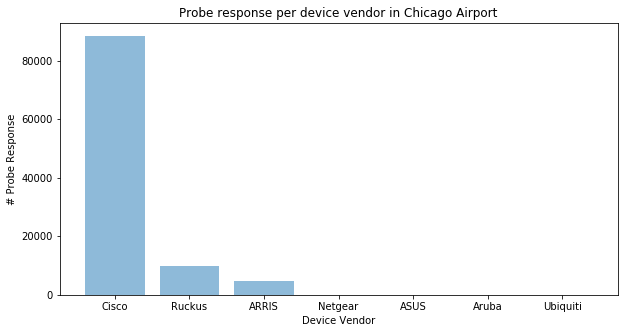

In [73]:
print("Unique AP vendor list in Chicago Airport")
print(hist_ap)

plot_histogram2(hist_ap)

<h3> Warsaw Airport, Chicago Downtown, and Ingolstadt Village Datasets (Pre-plotted) </h3>

<h3> Warsaw Airpot </h3>
<img src="ap_vendor_warsaw.png" alt="Warsaw Airport" style="float: left;">

<h3> Chicago Downtown </h3>
<img src="ap_vendor_downtown.png" alt="Downtown Chicago" style="float: left;">

<h3> Ingolstadt Village </h3>
<img src="ap_vendor_ingolstadt.png" alt="Ingolstadt Village" style="float: left;">

<h3> Analysis </h3>

- We assume that there is a planned deployment of Access Points in airports and malls. A single authority or a very few establishements authorised by it, are allowed to set up access points in these places. 
- The plots confirm our assumption. A limited set of AP device vendors can be observed, in which one dominates. The wireless infrastructure at Chicago airport is dominated by Cisco, Warsaw Airport uses Ubiquiti Networks and Ingolstadt Village employs ARRIS infrastructure.
- The Chicago downtown plots when compared to airport plots, show diversity in access point device vendors. Still it can be observed that Cisco is the dominant player in the networking space.